# Summary

This notebook allows to study the behaviour of the convex metrics by manually introducing the error values.

# Libraries

In [ ]:
import sys

sys.path.append("../")

from src.convex_combination import ConvexMetrics

# Execution

In [1]:
convex_metrics = ConvexMetrics(store_metrics=True)
e1_list = [0]
e2_list = [0]
e_list = [0]

In [2]:
# The convex error is the convex combination of the errors
e1 = 0.7
e2 = 0.2
for _ in range(100):
    e = convex_metrics.combine(e1, e2)
    convex_metrics.update(e, e1, e2)
    e_list.append(e)
    e1_list.append(e1)
    e2_list.append(e2)

In [23]:
# The convex error is manually introduced together with e1 and e2
for _ in range(10):
    convex_metrics.update(0.55, 0.4, 0.7)

# Plotting

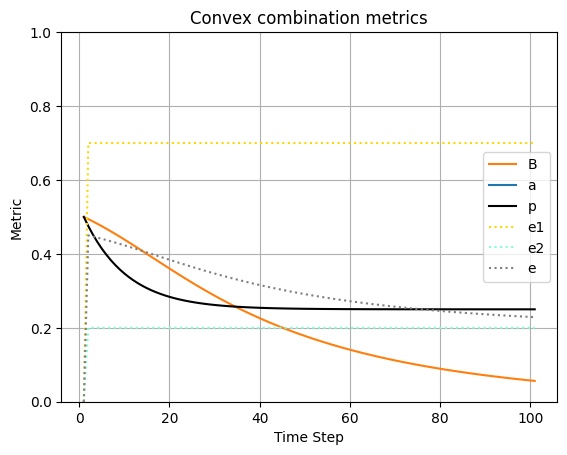

In [3]:
import matplotlib.pyplot as plt

n_samples = len(convex_metrics.B_list)

# Plotting
fig, ax = plt.subplots()
ax.plot(range(1, n_samples + 1), convex_metrics.B_list, "-", color="tab:orange", label="B")
ax.plot(range(1, n_samples + 1), convex_metrics.a_list, "-", color="tab:blue", label="a")
ax.plot(range(1, n_samples + 1), convex_metrics.p_list, "-", color="k", label="p")
ax.plot(range(1, n_samples + 1), e1_list, ":", color="gold", label="e1")
ax.plot(range(1, n_samples + 1), e2_list, ":", color="aquamarine", label="e2")
ax.plot(range(1, n_samples + 1), e_list, ":", color="tab:gray", label="e")
ax.set_xlim(0, n_samples + 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Time Step")
ax.set_ylabel("Metric")
ax.set_title("Convex combination metrics")
ax.legend()
ax.grid()